In [ ]:
!pip install pandas rasterio netCDF4 rioxarray
import os
import re
import sys
import random
from pathlib import Path

import requests
import json
import xml.etree.ElementTree as ET
import certifi

import pandas as pd
import numpy as np

import rasterio
import matplotlib.pyplot as plt
import matplotlib.image
from rasterio.windows import Window

import netCDF4 as nc

import rioxarray
from rasterio.control import GroundControlPoint

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 39.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 52.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 49.0 MB/s eta 0:00:00


In [ ]:
url_dataspace = "https://catalogue.dataspace.copernicus.eu/odata/v1"
#https://catalogue.dataspace.copernicus.eu/odata/v1

# Filtering
satellite = "SENTINEL-3"
level= "LST"
cloud_cover_max = 0.2

aoi_point ="POINT(77.8858 29.8543)"
aoi_polygon = "POLYGON ((77.8237 29.8437, 77.9322 29.8437, 77.9322 29.8776, 77.8237 29.8776, 77.8237 29.8437))"

start_date = "2023-06-01"
end_date = "2023-06-10"
start_date_full =start_date+"T00:00:00.000Z"
end_date_full = end_date +"T00:00:00.000Z"

In [ ]:
query = f"{url_dataspace}/Products?$filter=Collection/Name eq '{satellite}' and Attributes/OData.CSC.StringAttribute/any(att:att/Name eq 'productType' and att/OData.CSC.StringAttribute/Value eq '{level}') and OData.CSC.Intersects(area=geography'SRID=4326;{aoi_point}') and ContentDate/Start gt {start_date_full} and ContentDate/Start lt {end_date_full}"
response = requests.get(query).json()
result = pd.DataFrame.from_dict(response["value"])


# print first 10 results
result.head(10)

,@odata.mediaContentType,Id,Name,ContentType,ContentLength,OriginDate,PublicationDate,ModificationDate,Online,EvictionDate,S3Path,Checksum,ContentDate,Footprint,GeoFootprint
0,application/octet-stream,79489bea-522c-41e0-9d34-e3e5365d6cf4,S3A_SL_2_LST____20230601T044235_20230601T04453...,application/octet-stream,74288080,2023-06-02T13:48:53.410Z,2023-06-02T13:54:59.657Z,2023-06-02T13:55:05.750Z,True,,/eodata/Sentinel-3/SLSTR/SL_2_LST___/2023/06/0...,"[{'Value': '55f71f76d6c53e61064b7240868e0991',...","{'Start': '2023-06-01T04:42:34.982Z', 'End': '...","geography'SRID=4326;POLYGON ((72.3215 20.9723,...","{'type': 'Polygon', 'coordinates': [[[72.3215,..."
1,application/octet-stream,6108390b-18cd-40b0-8ced-4f74b2b8509b,S3B_SL_2_LST____20230605T165138_20230605T16543...,application/octet-stream,70794233,2023-06-05T18:00:17.191Z,2023-06-05T18:06:31.739Z,2023-09-19T15:20:15.733Z,True,,/eodata/Sentinel-3/SLSTR/SL_2_LST___/2023/06/0...,[],"{'Start': '2023-06-05T16:51:38.025Z', 'End': '...","geography'SRID=4326;POLYGON ((69.1766 20.186, ...","{'type': 'Polygon', 'coordinates': [[[69.1766,..."
2,application/octet-stream,0c833658-fa9b-4eaf-b9cc-7ee1707d83a3,S3B_SL_2_LST____20230602T051517_20230602T05181...,application/octet-stream,76247840,2023-06-03T00:36:18.852Z,2023-06-03T00:42:16.731Z,2023-09-19T14:15:30.969Z,True,,/eodata/Sentinel-3/SLSTR/SL_2_LST___/2023/06/0...,[],"{'Start': '2023-06-02T05:15:17.480Z', 'End': '...","geography'SRID=4326;POLYGON ((80.4838 28.6906,...","{'type': 'Polygon', 'coordinates': [[[80.4838,..."
3,application/octet-stream,d66d074c-6fdf-4cd2-968f-18087c651468,S3A_SL_2_LST____20230603T164207_20230603T16450...,application/octet-stream,71687161,2023-06-05T02:14:16.847Z,2023-06-05T02:20:10.705Z,2023-06-05T02:20:20.299Z,True,,/eodata/Sentinel-3/SLSTR/SL_2_LST___/2023/06/0...,"[{'Value': '40b73f47096d24e61166c7938c48264d',...","{'Start': '2023-06-03T16:42:06.568Z', 'End': '...","geography'SRID=4326;POLYGON ((68.3313 30.7053,...","{'type': 'Polygon', 'coordinates': [[[68.3313,..."
4,application/octet-stream,6c3a67d2-1a1f-48b4-9f9a-6fbf0f0a7d2c,S3A_SL_2_LST____20230608T050116_20230608T05041...,application/octet-stream,75109922,2023-06-08T07:11:42.908Z,2023-06-08T07:17:36.232Z,2023-06-11T05:43:15.863Z,True,,/eodata/Sentinel-3/SLSTR/SL_2_LST___/2023/06/0...,"[{'Value': '9721fb3f6f296e01805ffbd378aad9a0',...","{'Start': '2023-06-08T05:01:15.514Z', 'End': '...","geography'SRID=4326;POLYGON ((67.6486 20.9628,...","{'type': 'Polygon', 'coordinates': [[[67.6486,..."
5,application/octet-stream,c3b60e44-0810-424f-bdd1-78fde2089807,S3B_SL_2_LST____20230601T165523_20230601T16582...,application/octet-stream,68249801,2023-06-02T12:33:55.211Z,2023-06-02T12:40:36.668Z,2023-09-19T14:12:57.663Z,True,,/eodata/Sentinel-3/SLSTR/SL_2_LST___/2023/06/0...,[],"{'Start': '2023-06-01T16:55:22.999Z', 'End': '...","geography'SRID=4326;POLYGON ((68.2358 20.191, ...","{'type': 'Polygon', 'coordinates': [[[68.2358,..."
6,application/octet-stream,d75c88ec-a114-49a0-8bc6-7b8231d156d1,S3A_SL_2_LST____20230602T170818_20230602T17111...,application/octet-stream,70088155,2023-06-02T18:03:16.429Z,2023-06-02T18:09:15.577Z,2023-06-02T18:09:25.913Z,True,,/eodata/Sentinel-3/SLSTR/SL_2_LST___/2023/06/0...,"[{'Value': 'f7ddb906f6b61910952b48fc0827cf19',...","{'Start': '2023-06-02T17:08:17.672Z', 'End': '...","geography'SRID=4326;POLYGON ((61.7868 30.7004,...","{'type': 'Polygon', 'coordinates': [[[61.7868,..."
7,application/octet-stream,07aeec76-c686-4b21-a61d-7cea93bf2247,S3B_SL_2_LST____20230602T051517_20230602T05181...,application/octet-stream,78591119,2023-06-02T07:25:16.806Z,2023-06-02T07:32:01.711Z,2023-09-19T14:23:55.949Z,True,,/eodata/Sentinel-3/SLSTR/SL_2_LST___/2023/06/0...,[],"{'Start': '2023-06-02T05:15:17.483Z', 'End': '...","geography'SRID=4326;POLYGON ((80.4818 28.6843,...","{'type': 'Polygon', 'coordinates': [[[80.4818,..."
8,application/octet-stream,d921571a-10f4-4c1c-9856-7cef8c3bb84f,S3A_SL_2_LST____20230602T170818_20230602T17111...,application/

In [ ]:
result.to_csv('result_LST.csv', index=False)
#print(result_LST.csv)

In [ ]:
filtered_df = result[result["Name"].str.split("_").str[8].str.contains("T05|T17") & result["Name"].str.split("_").str[14].str.contains("PS2") & result["Name"].str.split("_").str[16].str.contains("NR")]

filtered_df = filtered_df.reset_index(drop=True)

print(filtered_df['Name'])

0    S3B_SL_2_LST____20230602T051517_20230602T05181...
Name: Name, dtype: object


In [ ]:
filtered_df.to_csv('result_LST_Filtered.csv', index=False)

In [ ]:
username = "apurwa_c@ce.iitr.ac.in"
password = "Apurwa@1234567"

auth_server_url = "https://identity.dataspace.copernicus.eu/auth/realms/CDSE/protocol/openid-connect/token"
data = {
    "client_id": "cdse-public",
    "grant_type": "password",
    "username": username,
    "password": password,
}

response = requests.post(auth_server_url, data=data, verify=True, allow_redirects=False)
access_token = json.loads(response.text)["access_token"]
# Establish session
session = requests.Session()
session.headers["Authorization"] = f"Bearer {access_token}"

In [ ]:
username = "apurwa_c@ce.iitr.ac.in"
password = "Apurwa@1234567"

auth_server_url = "https://identity.dataspace.copernicus.eu/auth/realms/CDSE/protocol/openid-connect/token"
data = {
    "client_id": "cdse-public",
    "grant_type": "password",
    "username": username,
    "password": password,
}

response = requests.post(auth_server_url, data=data, verify=True, allow_redirects=False)
access_token = json.loads(response.text)["access_token"]
# Establish session
session = requests.Session()
session.headers["Authorization"] = f"Bearer {access_token}"

In [ ]:
product_row_id = 0   # 0 for the first product in the list
product_id = filtered_df.iloc[product_row_id, 1]
print(product_id)
product_name = filtered_df.iloc[product_row_id, 2]
print(product_name)

nc_files_list = ['LST_in.nc','geodetic_in.nc','geodetic_tx.nc','geometry_tn.nc','cartesian_in.nc','cartesian_tx.nc','LST_ancillary_ds.nc','indices_in.nc','met_tx.nc','time_in.nc','flags_in.nc']

for nc_file in nc_files_list:
  print(nc_file)
  download_nc_files(url_dataspace,product_id,product_name,nc_file)

07aeec76-c686-4b21-a61d-7cea93bf2247
S3B_SL_2_LST____20230602T051517_20230602T051817_20230602T072426_0179_080_119_2340_PS2_O_NR_004.SEN3
LST_in.nc
301
https://download.dataspace.copernicus.eu/odata/v1/Products(07aeec76-c686-4b21-a61d-7cea93bf2247)/Nodes(S3B_SL_2_LST____20230602T051517_20230602T051817_20230602T072426_0179_080_119_2340_PS2_O_NR_004.SEN3)/Nodes(LST_in.nc)/$value


/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py:1100: InsecureRequestWarning: Unverified HTTPS request is being made to host 'download.dataspace.copernicus.eu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


geodetic_in.nc
301
https://download.dataspace.copernicus.eu/odata/v1/Products(07aeec76-c686-4b21-a61d-7cea93bf2247)/Nodes(S3B_SL_2_LST____20230602T051517_20230602T051817_20230602T072426_0179_080_119_2340_PS2_O_NR_004.SEN3)/Nodes(geodetic_in.nc)/$value


/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py:1100: InsecureRequestWarning: Unverified HTTPS request is being made to host 'download.dataspace.copernicus.eu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


geodetic_tx.nc
301
https://download.dataspace.copernicus.eu/odata/v1/Products(07aeec76-c686-4b21-a61d-7cea93bf2247)/Nodes(S3B_SL_2_LST____20230602T051517_20230602T051817_20230602T072426_0179_080_119_2340_PS2_O_NR_004.SEN3)/Nodes(geodetic_tx.nc)/$value


/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py:1100: InsecureRequestWarning: Unverified HTTPS request is being made to host 'download.dataspace.copernicus.eu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


geometry_tn.nc
301
https://download.dataspace.copernicus.eu/odata/v1/Products(07aeec76-c686-4b21-a61d-7cea93bf2247)/Nodes(S3B_SL_2_LST____20230602T051517_20230602T051817_20230602T072426_0179_080_119_2340_PS2_O_NR_004.SEN3)/Nodes(geometry_tn.nc)/$value


/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py:1100: InsecureRequestWarning: Unverified HTTPS request is being made to host 'download.dataspace.copernicus.eu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


cartesian_in.nc
301
https://download.dataspace.copernicus.eu/odata/v1/Products(07aeec76-c686-4b21-a61d-7cea93bf2247)/Nodes(S3B_SL_2_LST____20230602T051517_20230602T051817_20230602T072426_0179_080_119_2340_PS2_O_NR_004.SEN3)/Nodes(cartesian_in.nc)/$value


/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py:1100: InsecureRequestWarning: Unverified HTTPS request is being made to host 'download.dataspace.copernicus.eu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


cartesian_tx.nc
301
https://download.dataspace.copernicus.eu/odata/v1/Products(07aeec76-c686-4b21-a61d-7cea93bf2247)/Nodes(S3B_SL_2_LST____20230602T051517_20230602T051817_20230602T072426_0179_080_119_2340_PS2_O_NR_004.SEN3)/Nodes(cartesian_tx.nc)/$value


/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py:1100: InsecureRequestWarning: Unverified HTTPS request is being made to host 'download.dataspace.copernicus.eu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


LST_ancillary_ds.nc
301
https://download.dataspace.copernicus.eu/odata/v1/Products(07aeec76-c686-4b21-a61d-7cea93bf2247)/Nodes(S3B_SL_2_LST____20230602T051517_20230602T051817_20230602T072426_0179_080_119_2340_PS2_O_NR_004.SEN3)/Nodes(LST_ancillary_ds.nc)/$value


/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py:1100: InsecureRequestWarning: Unverified HTTPS request is being made to host 'download.dataspace.copernicus.eu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


indices_in.nc
301
https://download.dataspace.copernicus.eu/odata/v1/Products(07aeec76-c686-4b21-a61d-7cea93bf2247)/Nodes(S3B_SL_2_LST____20230602T051517_20230602T051817_20230602T072426_0179_080_119_2340_PS2_O_NR_004.SEN3)/Nodes(indices_in.nc)/$value


/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py:1100: InsecureRequestWarning: Unverified HTTPS request is being made to host 'download.dataspace.copernicus.eu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


met_tx.nc
301
https://download.dataspace.copernicus.eu/odata/v1/Products(07aeec76-c686-4b21-a61d-7cea93bf2247)/Nodes(S3B_SL_2_LST____20230602T051517_20230602T051817_20230602T072426_0179_080_119_2340_PS2_O_NR_004.SEN3)/Nodes(met_tx.nc)/$value


/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py:1100: InsecureRequestWarning: Unverified HTTPS request is being made to host 'download.dataspace.copernicus.eu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


time_in.nc
301
https://download.dataspace.copernicus.eu/odata/v1/Products(07aeec76-c686-4b21-a61d-7cea93bf2247)/Nodes(S3B_SL_2_LST____20230602T051517_20230602T051817_20230602T072426_0179_080_119_2340_PS2_O_NR_004.SEN3)/Nodes(time_in.nc)/$value


/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py:1100: InsecureRequestWarning: Unverified HTTPS request is being made to host 'download.dataspace.copernicus.eu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


flags_in.nc
301
https://download.dataspace.copernicus.eu/odata/v1/Products(07aeec76-c686-4b21-a61d-7cea93bf2247)/Nodes(S3B_SL_2_LST____20230602T051517_20230602T051817_20230602T072426_0179_080_119_2340_PS2_O_NR_004.SEN3)/Nodes(flags_in.nc)/$value


/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py:1100: InsecureRequestWarning: Unverified HTTPS request is being made to host 'download.dataspace.copernicus.eu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [ ]:
# e image grid (*_i?.nc files) and tie-point grid (*_t?.nc files)
data = nc.Dataset('/content/LST_in.nc')                # LST in K
geodetic = nc.Dataset('/content/geodetic_in.nc')       # geolocation  in Geodetic
geodetictx = nc.Dataset('/content/geodetic_tx.nc')
geometry = nc.Dataset('/content/geometry_tn.nc')       # satellite and solar zenith and azimuth viewing angles
cartesian = nc.Dataset('/content/cartesian_in.nc')     # geolocation  in Cartesian
cartesiantx = nc.Dataset('/content/cartesian_tx.nc')   #
data_anc = nc.Dataset('/content/LST_ancillary_ds.nc')  # LST uncertainty in K, TCWV (total column water vapour in kg m-2), biome, and fraction (fractional vegetation cover), NDVI, exception (quality control flags)
indic = nc.Dataset('/content/indices_in.nc')           # instrument level scan, pixel and detector origins
mettx = nc.Dataset('/content/met_tx.nc')               # meteorological conditions
timein = nc.Dataset('/content/time_in.nc')             # acquisition time
flagin = nc.Dataset('/content/flags_in.nc')            # cloud masking

print(geodetic.variables.keys())
print(geodetictx.variables.keys())
print(geometry.variables.keys())
print(cartesian.variables.keys())
print(cartesiantx.variables.keys())
print(indic.variables.keys())
print(mettx.variables.keys())
print(timein.variables.keys())
print(flagin.variables.keys())

dict_keys(['elevation_in', 'elevation_orphan_in', 'latitude_in', 'latitude_orphan_in', 'longitude_in', 'longitude_orphan_in'])
dict_keys(['latitude_tx', 'longitude_tx'])
dict_keys(['sat_azimuth_tn', 'sat_path_tn', 'sat_zenith_tn', 'solar_azimuth_tn', 'solar_path_tn', 'solar_zenith_tn'])
dict_keys(['x_in', 'x_orphan_in', 'y_in', 'y_orphan_in'])
dict_keys(['x_tx', 'y_tx'])
dict_keys(['detector_in', 'detector_orphan_in', 'l0_scan_offset_in', 'pixel_in', 'pixel_orphan_in', 'scan_in', 'scan_orphan_in'])
dict_keys(['cloud_fraction_tx', 'dew_point_tx', 'east_west_stress_tx', 'latent_heat_tx', 'north_south_stress_tx', 'p_atmos', 'sea_ice_fraction_tx', 'sea_surface_temperature_tx', 'sensible_heat_tx', 'skin_temperature_tx', 'snow_albedo_tx', 'snow_depth_tx', 'soil_wetness_tx', 'solar_radiation_tx', 'specific_humidity_tx', 'surface_pressure_tx', 't_bound', 't_forecast', 't_series', 't_single', 'temperature_profile_tx', 'temperature_tx', 'thermal_radiation_tx', 'total_column_ozone_tx', 'total_col

In [ ]:
import rioxarray

with rioxarray.open_rasterio(f'netcdf:/content/geodetic_in.nc:latitude_in') as lat:
  with rioxarray.open_rasterio(f'netcdf:/content/geodetic_in.nc:longitude_in') as lon:
    with rioxarray.open_rasterio(f'netcdf:/content/geodetic_in.nc:elevation_in') as alt:
      with rioxarray.open_rasterio(f'netcdf:/content/LST_in.nc:LST') as LST:

        nof_gcp_x = np.arange(0, LST.x.size, 30)
        nof_gcp_y = np.arange(0, LST.y.size, 30)
        gcps = []
        id = 0

        for x in nof_gcp_x:
          for y in nof_gcp_y:
            gcps.append(GroundControlPoint(row=y, col=x, x=lon.data[0, y, x]*lon.scale_factor, y=lat.data[0, y, x] * lat.scale_factor, z=alt.data[0, y, x] * alt.scale_factor, id=id))
            id += 1
        tr_gcp = rasterio.transform.from_gcps(gcps)



def convert_to_tif(layer_name, title):
    with rioxarray.open_rasterio(f'netcdf:{layer_name}') as data:
        data.rio.write_crs("EPSG:4326", inplace=True)
        data.rio.write_transform(transform=tr_gcp, inplace=True)
        filename = layer_name.split(':')[1]
        if "_" in filename:
          filename =filename.split('_')[0]

        data.rio.to_raster(f"{title}_{filename}.tif", recalc_transform=False)
        data_Final = data.rio.reproject(dst_crs="EPSG:4326",gcps=gcps, **{"SRC_METHOD": "GCP_TPS"})

        data_Final.rio.to_raster(f"{title}_{filename}_reproj.tif", recalc_transform=False)
        print(f'Saved {layer_name}')

layer_name = ['LST_in.nc:LST','LST_ancillary_ds.nc:fraction','LST_ancillary_ds.nc:NDVI','LST_ancillary_ds.nc:biome','flags_in.nc:bayes_in','flags_in.nc:cloud_in']
for name in layer_name:
  convert_to_tif(name,title ='Sentinel-3_L2')

/usr/local/lib/python3.10/dist-packages/rioxarray/_io.py:1132: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
/usr/local/lib/python3.10/dist-packages/rioxarray/_io.py:1132: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
/usr/local/lib/python3.10/dist-packages/rioxarray/_io.py:1132: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
/usr/local/lib/python3.10/dist-packages/rioxarray/_io.py:1132: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.messag

Saved LST_in.nc:LST


/usr/local/lib/python3.10/dist-packages/rioxarray/_io.py:1132: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore


Saved LST_ancillary_ds.nc:fraction


/usr/local/lib/python3.10/dist-packages/rioxarray/_io.py:1132: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore


Saved LST_ancillary_ds.nc:NDVI


/usr/local/lib/python3.10/dist-packages/rioxarray/_io.py:1132: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore


Saved LST_ancillary_ds.nc:biome


/usr/local/lib/python3.10/dist-packages/rioxarray/_io.py:1132: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore


KeyboardInterrupt: 

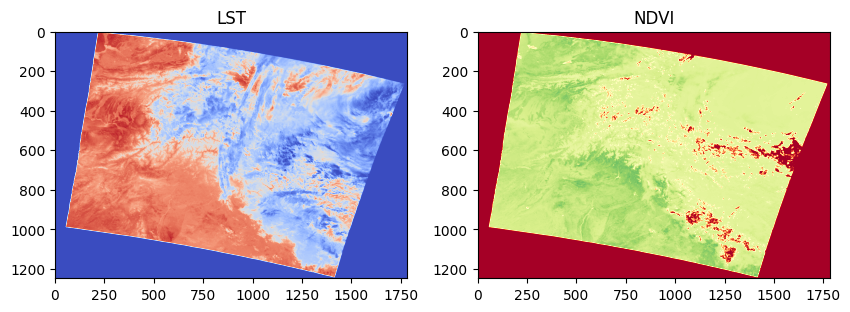

In [ ]:
import rasterio
import matplotlib.pyplot as plt

# Open the LST raster
with rasterio.open('Sentinel-3_L2_LST_reproj.tif') as lst:
    lst_data = lst.read(1)

# Open the NDVI raster
with rasterio.open('Sentinel-3_L2_NDVI_reproj.tif') as ndvi:
    ndvi_data = ndvi.read(1)

# Plot the rasters side by side
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 6))
ax1.imshow(lst_data, cmap='coolwarm')
ax1.set_title('LST')
ax2.imshow(ndvi_data, cmap='RdYlGn')
ax2.set_title('NDVI')
plt.show()

(0.0020000000949949026,)
(290.0,)
(4.999999873689376e-05,)
(0.0,)


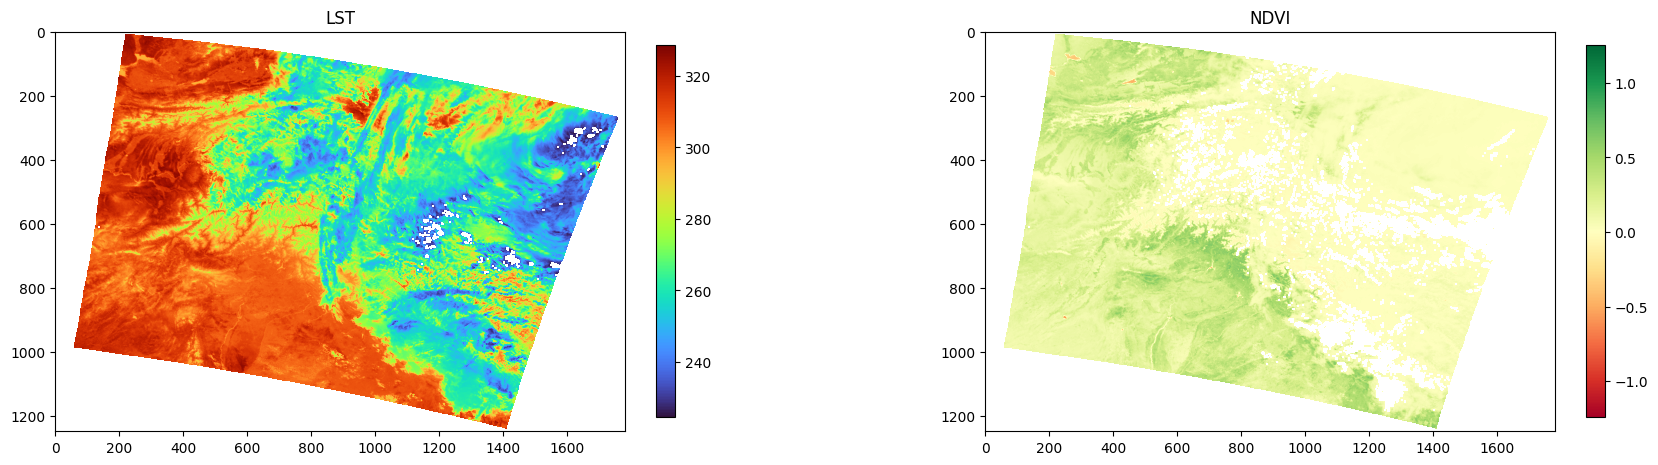

In [ ]:
import rasterio
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# Open the LST raster
with rasterio.open('Sentinel-3_L2_LST_reproj.tif') as lst:
    lst_data = lst.read(1).astype(float)
    print(lst.scales)
    print(lst.offsets)
    scaling_factor = lst.scales[0]
    scaling_offsets = lst.offsets[0]

    lst_data[lst_data==-32768]=np.nan
    lst_data=lst_data * scaling_factor + scaling_offsets
    lst_cmap = plt.cm.turbo
    lst_norm = colors.Normalize(vmin=np.nanmin(lst_data), vmax=np.nanmax(lst_data))

# Open the NDVI raster
with rasterio.open('Sentinel-3_L2_NDVI_reproj.tif') as ndvi:
    ndvi_data = ndvi.read(1).astype(float)
    print(ndvi.scales)
    print(ndvi.offsets)
    scaling_factor = ndvi.scales[0]
    scaling_offsets = ndvi.offsets[0]

    ndvi_data[ndvi_data==-32768]=np.nan
    ndvi_data = ndvi_data * scaling_factor
    ndvi_cmap = plt.cm.RdYlGn
    ndvi_norm = colors.Normalize(vmin=np.nanmin(ndvi_data), vmax=np.nanmax(ndvi_data))

# Plot the rasters side by side
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 12))
im1 = ax1.imshow(lst_data, cmap=lst_cmap, norm=lst_norm)
ax1.set_title('LST')
fig.colorbar(im1, ax=ax1, fraction=0.03)

im2 = ax2.imshow(ndvi_data, cmap=ndvi_cmap, norm=ndvi_norm)
ax2.set_title('NDVI')
fig.colorbar(im2, ax=ax2, fraction=0.03)

plt.subplots_adjust(wspace=0.5)
plt.show()

(1.0,)
(0.0,)
(0.0020000000949949026,)
(290.0,)
(4.999999873689376e-05,)
(0.0,)


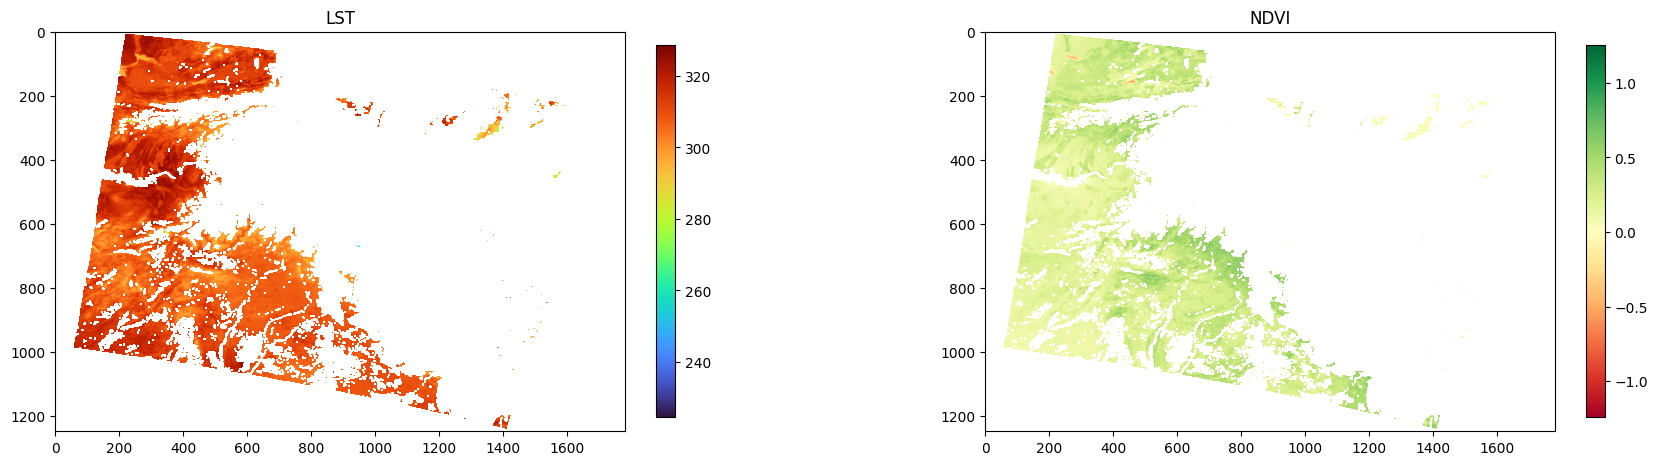

In [ ]:
import rasterio
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# Open the Cloud raster
with rasterio.open('Sentinel-3_L2_cloud_reproj.tif') as cloud:
    cloud_data = cloud.read(1).astype(float)
    print(cloud.scales)
    print(cloud.offsets)
    scaling_factor = cloud.scales[0]
    scaling_offsets = cloud.offsets[0]

    cloud_data[cloud_data==65535]=np.nan
    cloud_data = cloud_data * scaling_factor
    cloud_cmap = plt.cm.RdYlGn
    cloud_norm = colors.Normalize(vmin=np.nanmin(cloud_data), vmax=np.nanmax(cloud_data))

# Open the LST raster
with rasterio.open('Sentinel-3_L2_LST_reproj.tif') as lst:
    lst_data = lst.read(1).astype(float)
    print(lst.scales)
    print(lst.offsets)
    scaling_factor = lst.scales[0]
    scaling_offsets = lst.offsets[0]

    lst_data[lst_data==-32768]=np.nan
    lst_data=lst_data * scaling_factor + scaling_offsets
    lst_cmap = plt.cm.turbo
    lst_norm = colors.Normalize(vmin=np.nanmin(lst_data), vmax=np.nanmax(lst_data))

    # Apply the mask to the LST data
    lst_data[cloud_data>0] = np.nan


# Open the NDVI raster
with rasterio.open('Sentinel-3_L2_NDVI_reproj.tif') as ndvi:
    ndvi_data = ndvi.read(1).astype(float)
    print(ndvi.scales)
    print(ndvi.offsets)
    scaling_factor = ndvi.scales[0]
    scaling_offsets = ndvi.offsets[0]

    ndvi_data[ndvi_data==-32768]=np.nan
    ndvi_data = ndvi_data * scaling_factor
    ndvi_cmap = plt.cm.RdYlGn
    ndvi_norm = colors.Normalize(vmin=np.nanmin(ndvi_data), vmax=np.nanmax(ndvi_data))

    # Apply the mask to the NDVI data
    ndvi_data[cloud_data>0] = np.nan

# Plot the rasters side by side
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 12))
im1 = ax1.imshow(lst_data, cmap=lst_cmap, norm=lst_norm)
ax1.set_title('LST')
fig.colorbar(im1, ax=ax1, fraction=0.03)

im2 = ax2.imshow(ndvi_data, cmap=ndvi_cmap, norm=ndvi_norm)
ax2.set_title('NDVI')
fig.colorbar(im2, ax=ax2, fraction=0.03)

plt.subplots_adjust(wspace=0.5)
plt.show()

(4.999999873689376e-05,)
(0.0,)
(0.0020000000949949026,)
(290.0,)


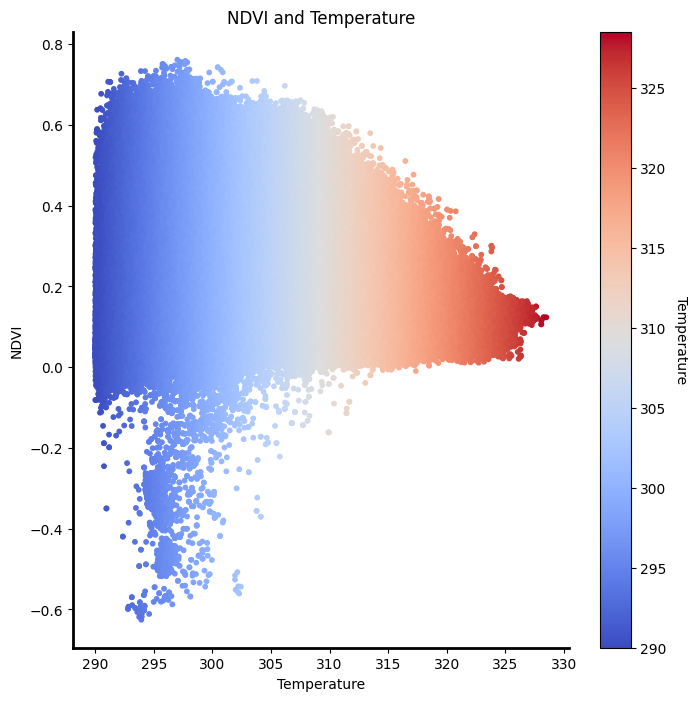

In [ ]:
import rasterio
import matplotlib.pyplot as plt

# Open the NDVI and temperature raster files
ndvi_file = rasterio.open('Sentinel-3_L2_NDVI_reproj.tif')
temp_file = rasterio.open('Sentinel-3_L2_LST_reproj.tif')


# Read the raster data and apply the scaling factor
ndvi_data = ndvi_file.read(1).astype(float)
print(ndvi_file.scales)
print(ndvi_file.offsets)
scaling_factor = ndvi_file.scales[0]
scaling_offsets = ndvi_file.offsets[0]
ndvi_data[ndvi_data==-32768]=np.nan
ndvi_data = ndvi_data * scaling_factor +scaling_offsets


temp_data = temp_file.read(1).astype(float)
print(temp_file.scales)
print(temp_file.offsets)
scaling_factor = temp_file.scales[0]
scaling_offsets = temp_file.offsets[0]
temp_data[temp_data==-32768]=np.nan
temp_data=temp_data * scaling_factor + scaling_offsets


# Filter the NDVI data based on the LST data
ndvi_data_filtered = np.where((temp_data >= 290) & (temp_data <= 360), ndvi_data, np.nan)

# Filter the LST data based on the filtered NDVI data
temp_data_filtered = np.where(np.isnan(ndvi_data_filtered), np.nan, temp_data)


# Set up the plot
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_title('NDVI and Temperature')
ax.set_xlabel('Temperature')
ax.set_ylabel('NDVI')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)

# Plot the data
scatter = ax.scatter(temp_data_filtered.flatten(), ndvi_data_filtered.flatten(), s=10, c=temp_data_filtered.flatten(), cmap='coolwarm')
cbar = plt.colorbar(scatter)
cbar.ax.set_ylabel('Temperature', rotation=270, labelpad=15)

plt.show()

In [ ]:
import rasterio
import numpy as np

def calculate_soil_moisture(ndvi_path, lst_path, output_path, a, b, c, d):
    # Load NDVI and LST rasters
    with rasterio.open(ndvi_path) as ndvi_ds:
        ndvi = ndvi_ds.read(1)

    with rasterio.open(lst_path) as lst_ds:
        lst = lst_ds.read(1)
        profile = lst_ds.profile

    # Calculate LST_wet and LST_dry
    lst_wet = a - b * ndvi
    lst_dry = d - c * ndvi

    # Calculate soil moisture
    soil_moisture = (lst_dry - lst) / (lst_dry - lst_wet)

    # Clip values to be between 0 and 1
    soil_moisture = np.clip(soil_moisture, 0, 1)

    # Write the result to a new raster
    profile.update(dtype=rasterio.float32, count=1)

    with rasterio.open(output_path, 'w', **profile) as dst:
        dst.write(soil_moisture, 1)

# Example usage with coefficients
ndvi_path = 'Sentinel-3_L2_NDVI_reproj.tif'
lst_path = 'Sentinel-3_L2_LST_reproj.tif'
output_path = 'soil_moisture.tif'
coefficients = (310, 17, 15, 320)

calculate_soil_moisture(ndvi_path, lst_path, output_path, *coefficients)

<ipython-input-43-4789d8587397>:18: RuntimeWarning: divide by zero encountered in divide
  soil_moisture = (lst_dry - lst) / (lst_dry - lst_wet)


<ipython-input-44-78a31639bf4b>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('RdYlGn')


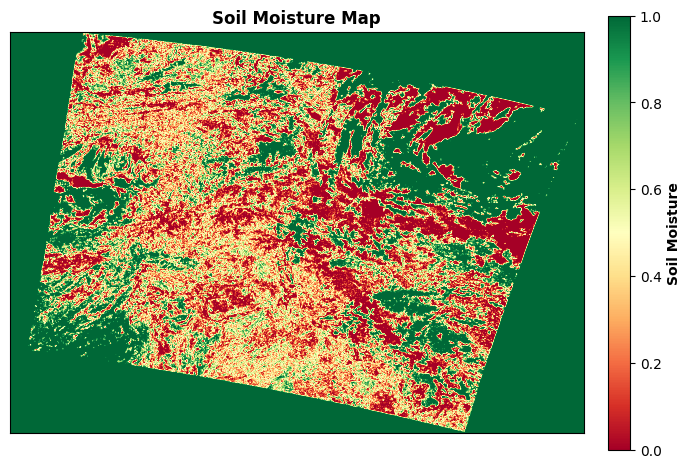

In [ ]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

def plot_soil_moisture(raster_path):
    # Read the soil moisture raster
    with rasterio.open(raster_path) as ds:
        soil_moisture = ds.read(1)

    # Define a continuous color ramp
    cmap = plt.cm.get_cmap('RdYlGn')

    # Set up the plot
    fig, ax = plt.subplots(figsize=(8, 8))
    im = ax.imshow(soil_moisture, cmap=cmap, vmin=0, vmax=1)

    # Add color bar
    cbar = plt.colorbar(im, ax=ax, fraction=0.035, pad=0.04)
    cbar.set_label('Soil Moisture', fontweight='bold')

    # Set plot title and axis labels
    plt.title('Soil Moisture Map', fontweight='bold')


    # Turn off x-axis and y-axis
    ax.set_xticks([])
    ax.set_yticks([])

    # Show the plot
    plt.show()

# Example usage
soil_moisture_path = 'soil_moisture.tif'
plot_soil_moisture(soil_moisture_path)